#  Playing with pandas



Sources for this playground is the standard library pandas and input from kaggle tweet desaster or other webpages

---



## 1.Mount drive

In [199]:
#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Update to tables library-pandas need that to avoid write errors

In [ ]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3 MB 16.0 MB/s 
  Attempting uninstall: tables
    Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


## 2. Loading libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/pandas-playground/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## 3.Checking for missing values

In [ ]:
missing_values= df.isnull().sum().sort_values(ascending= False)/len(df)
print(len(missing_values[missing_values>0]), 'are with missing values' )
print(missing_values[missing_values>0])

2 are with missing values
location    0.332720
keyword     0.008013
dtype: float64


In [ ]:
df.sample(5)

,id,keyword,location,text,target
2638,3786,destruction,Jersey,That's the ultimate road to destruction,0
4772,6790,lightning,"Asheboro, NC",Some crazy lightning outside,0
1002,1454,body%20bagging,NaN,@amaramin3 Meek is definitely capable of body ...,0
4275,6073,heat%20wave,Planet of da Bathing Apes,Heat wave gotta be over 9000 today,1
6057,8656,sinkhole,Newcastle,150-Foot Sinkhole Opens in Lowndes County Resi...,1


## Filling na to avoid the problems with all types of string functions ill na it looks as it should be a str type so with empty '' teh best way is to use earlier prepared dictionary what shpould be replaced


In [ ]:
{x:'' for x in list(df.columns)}

{'id': '', 'keyword': '', 'location': '', 'target': '', 'text': ''}

In [ ]:
fillna_dict={'keyword': '', 'location': '', 'text': ''}

In [ ]:
{x:'str' for x in list(df.columns)}

{'id': 'str',
 'keyword': 'str',
 'location': 'str',
 'target': 'str',
 'text': 'str'}

In [ ]:
fill_astype_dict={ 'keyword': 'str',
 'location': 'str',
 'text': 'str',}

In [ ]:
df= df.fillna(fillna_dict)

In [ ]:
df= df.astype(fill_astype_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df.sample(7)

,id,keyword,location,text,target
3928,5586,flood,Hawaii USA,iembot_hfo : At 10:00 AM 2 NNW Hana [Maui Co H...,1
5576,7957,rainstorm,ECSU16,The way you move is like a full on rainstorm a...,0
419,608,arsonist,ss,@Casper_rmg u on dick,0
6334,9055,structural%20failure,,@SirTitan45 Mega mood swing on a 24 hr schedu...,0
3621,5169,fatalities,Cape Town,City implores motorists not to speed after mor...,1
445,644,arsonist,,Big Top Burning The True Story Of An Arsonist ...,1
251,356,annihilation,CA physically- Boston Strong?,U.S National Park Services Tonto National Fore...,1


In [ ]:
list(df.columns)

['id', 'keyword', 'location', 'text', 'target']

## Making sure that content is utf-8 so decode/encode routine done 

In [ ]:
# df= df.encode('utf-8', 'ignore').decode('utf-8')

for a in ['keyword', 'location', 'text']:
    df[a].apply(lambda x: x.encode('utf-8', 'ignore').decode('utf-8'))

In [ ]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [ ]:
df['text_len']= df['text'].apply(lambda x: len(x))

In [ ]:
df.sample(5)

,id,keyword,location,text,target,text_len
3184,4571,emergency%20plan,Calgary,Hello Calgary!! Important news!! Please be adv...,1,76
5685,8112,rescued,,I liked a @YouTube video http://t.co/45TWHJ0l6...,0,89
4791,6815,loud%20bang,Photo : Blue Mountains,#auspol Can you see the resemblance between AB...,0,139
6947,9965,tsunami,"Washington, DC",I'm at Baan Thai / Tsunami Sushi in Washington...,0,73
3474,4969,explosion,Germany,I liked a @YouTube video http://t.co/bGAJ2oAX1...,1,101


## Example of filtering values in particular column a bit mor than a simple filter using $ 

In [ ]:
df[(df['text_len']>7) &  (df['text_len']<120)  &  (df['keyword'].str.contains('hazard'))]

,id,keyword,location,text,target,text_len
4179,5935,hazard,,@ClassyColkett Thorgan Hazard made his move pe...,0,82
4180,5937,hazard,Australia,#Lifestyle Û÷It makes me sickÛª: Baby clothe...,0,115
4181,5938,hazard,,@LongBreastYat Yeah I don't think he's elite e...,0,108
4182,5939,hazard,"Alameda, CA",Choking Hazard Prompts Recall Of Kraft Cheese ...,1,76
4183,5942,hazard,"London, England",Seeing Hazard without the beard like... http:/...,0,62
4184,5943,hazard,Arizona,Get that hazard pay,0,19
4186,5947,hazard,a van down by the river,@phiddleface NOT IF THERES A CHOKING HAZARD!!!...,0,81
4187,5949,hazard,,Road Hazard @ CASCADE RD SW / CHILDRESS DR SW ...,0,68
4191,5954,hazard,,The Eden Hazard of Hockey https://t.co/RbbnjkoqUD,0,49
4192,5955,hazard,Chicago,CONFIRMED: Sanchez Hazard and Bolasie will be ...,1,101


In [ ]:
df.loc[4234].text

'@TheBlackshag @dannyoneil too toxic...cancer....disease...hazardous waste...noxious...'

In [ ]:
df.describe()

,id,target,text_len
count,7613.000000,7613.00000,7613.000000
mean,5441.934848,0.42966,101.037436
std,3137.116090,0.49506,33.781325
min,1.000000,0.00000,7.000000
25%,2734.000000,0.00000,78.000000
50%,5408.000000,0.00000,107.000000
75%,8146.000000,1.00000,133.000000
max,10873.000000,1.00000,157.000000


## Using standard lda library fro sklearn

Latent Dirichlet Allocation is a form of unsupervised Machine Learning that is usually used for topic modelling in Natural Language Processing tasks. It is a very popular model for these type of tasks and the algorithm behind it is quite easy to understand and use. Also, the Scikit-Learn library has a very good implementation for the algorithm,


Topic Modelling is an unsupervised Machine Learning task where we try to discover "abstract topics" that can describe a collection of documents. This means we have a collection of texts and we try to find patterns of words and phrases that can help us cluster the documents and group them by "topics".

I put topics into quotes and I call them abstract topics because these are not obvious topics and we don't need them to be. We work on the assumption that similar documents will have similar patterns of words and phrases

For example, let's say we have a collection of 100 texts. We go through each text and discover that ten of them contain words like "machine learning", "training", "supervised", "unsupervised", "dataset" and so on. We may not know what these words mean and we really don't care.

We only see a pattern here, that 10% of our articles contain these words and we conclude that they should be included in the same topic. We can't actually name the topic and again, this is not needed. We are able to cluster these 10 articles into the same topic. And when we get a new text which we have never seen before, we look into it, we find it contains some of these words, then we'll be able to say "hey, this goes into the same category with the other 10 articles!"


---

Latent Dirichlet Allocation algorithm works with a few simple steps. The only preprocessing we need to do is the one we do in almost all text processing tasks: removing the stopwords(words that, with a high probability, are found in most of the documents and don't bring any value)  from all of our documents.

  * Establish a number of n topics that will be identified by the LDA algorithm. How can we find the perfect number of topics? Well, it's not very easy and it's usually a trial and error process: we try different values for n until we are satisfied with the results. Or, maybe we are lucky and we have other information about the dataset that allows us to establish the perfect number of topics.
  * Assign every word in every document to a temporary topic. This temporary topic will be random at first, but will be updated in the next step.
  * For this step we will go through every document and then every word in that document and compute 2 values

the probability that this document belongs to a certaintopic; this is based on how many words(except the currrent word) from this document belong to the topic of the current word

the proportion of documents that are assigned to the topic of the current word because of the current word.

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(
    stop_words='english',
    ngram_range=(1,1),
    max_df=0.9,
    min_df=2,
    max_features=10000,
    binary=False
)

lda = LatentDirichletAllocation(
    n_components=10,
    doc_topic_prior=None,  #defaults to 1/n_components; called alpha
    n_jobs=-1,
    max_iter=50,
    random_state=2020
)

In [ ]:
count_vec=count_vectorizer.fit_transform(df.text)

In [ ]:
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(count_vec)
doc_vectors = lda.transform(count_vec)

### Calculate the likelihood of the documents

Given the topic model, we can talk about the likelihood of a document give our corpus topic distribution. Now we calculate the likelihood of the documents under the topic model. Then this enables us to drop or flag unlikely documents.

In [ ]:
log_likelihoods = [lda.score(d) for d in count_vec]

In [ ]:
df["log_likelihood"] = log_likelihoods

In [ ]:
df.sample(7)

,id,keyword,location,text,target,text_len,log_likelihood
4363,6198,hijacker,,School Bus Hijacker Given Parole After 39 Year...,1,70,-22224.749419
2467,3535,derailment,,http://t.co/BAGEF9lFGT 25 killed 50 injured in...,1,106,-22240.228576
1901,2732,crushed,"Bucks County, Pa",crushed a 6 mile run tonight. awesome,0,37,-22207.788509
7306,10456,wild%20fires,planet earth,@cnni @PrisonPlanet Climate Change CNN weather...,1,137,-22253.458827
7469,10686,wreck,,@Captainn_Morgan car wreck ??,1,29,-22181.815687
350,502,army,,17.Beyonce Is my pick for http://t.co/thoYhrHk...,0,89,-22240.542311
6996,10032,twister,"Calgary, Alberta",Anyone wanna come over and watch Twister with ...,0,62,-22197.527472


In [ ]:
#this was hashed only to show what could be the problem of missing df
# figsize=(15,5)
# plt.hist(['log_likehood'], bins=100) / #here I did mistake and didnt put df and there is strange error

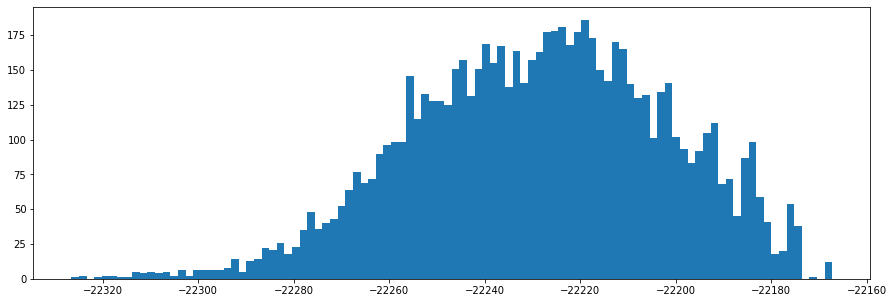

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(df["log_likelihood"], bins=100);

or using directly df

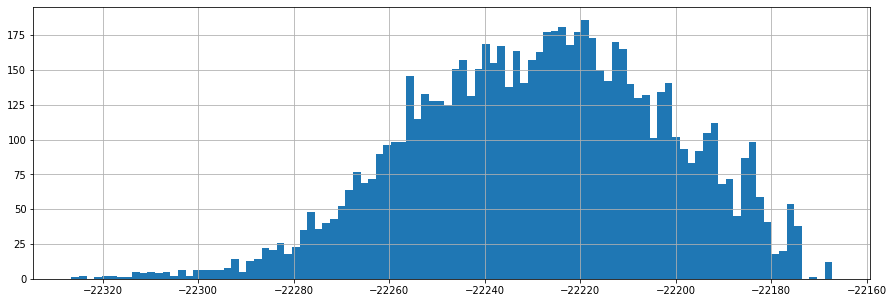

In [ ]:
df.log_likelihood.hist(bins=100, figsize=(15,5));

Here we can pick a reasonable threshold to invalidate documents. We just pick −32140-32140−32140 here, more sophisticated approaches can be used to determine a threshold.

Let’s look at some low probability examples.

In [ ]:
for a in df[df['log_likelihood']< -22300].text.sample(5).to_list():
    print(a)

@HowardU If 90BLKs&amp;8WHTs colluded 2 take WHT F @USAgov AUTH Hostage&amp;2 make her look BLK w/Bioterrorism&amp;use her lgl/org IDis ID still hers?
Parker Ridge Fact Sheet Aug 6 2015 (Parker Ridge Wildfire): Information Phone: 208-267-6773 Email: pa... http://t.co/ezEIsaSm0C #IDFire
INFO R. CURFEW IN OPER UNTIL 2030 Z. TAXIWAYS FOXTROT 5 &amp; FOXTROT 6 NAVBL. WND: 060/5. EXP INST APCH. RWY 05. DAMP. TMP: 10. QNH: 1028.
Disillusioned lead character 
Check
Happy go lucky free spirit girl
Check
Dream life crushed
Check
Great music
Check
All Crowe tropes intact
2pcs 18W CREE Led Work Light  Offroad Lamp Car Truck Boat Mining 4WD FLOOD BEAM - Full reaÛ_ http://t.co/VDeFmulx43 http://t.co/yqpAIjSa5g


In [ ]:
for a in df[df['log_likelihood']> -22260].text.sample(5).to_list():
    print(a)

@JohnsonTionne except idk them?? it's really burning ??????
Oil and Gas Exploration Takes Seismic Shift in Gabon to Somalia - Bloomberg http://t.co/bEKrPjnYHs #??????? #Somalia
Heavy rain frequent thunder and gusty winds moving into parts of Uptown and Midtown. http://t.co/KQJevYqzLV - CN http://t.co/HmWhob7prs
Annihilated Abs . ?? http://t.co/1xPw292tJe
VIDEO: 'We're picking up bodies from water': Rescuers are searching for hundreds of migrants in the Mediterran... http://t.co/s5NuEGSwYj


How would a random sentence from the new york times score?

In [ ]:
text = """
    this is very simple text should be from thotaly different fable lest see
    what LDA would say.
"""
test_count_data = count_vectorizer.transform([text])
test_log_likelihood = lda.score(count_vec)

print(test_log_likelihood)

-489148.8739650735


this is really unlikely! So it looks like our approach is going in the right direction.

lets then cut this left tail ie with values of like hood less then df[df['log_likelihood']< -22300]

lets take this set of likehood

In [ ]:
df_new=df[(df['log_likelihood']< -22170)&(df['log_likelihood']> -22280)]
df_new.info()
'So removed are only -->',len(df)-len(df_new)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7390 entries, 0 to 7612
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              7390 non-null   int64  
 1   keyword         7390 non-null   object 
 2   location        7390 non-null   object 
 3   text            7390 non-null   object 
 4   target          7390 non-null   int64  
 5   text_len        7390 non-null   int64  
 6   log_likelihood  7390 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 461.9+ KB


('So removed are only -->', 223)

Once agai histogram

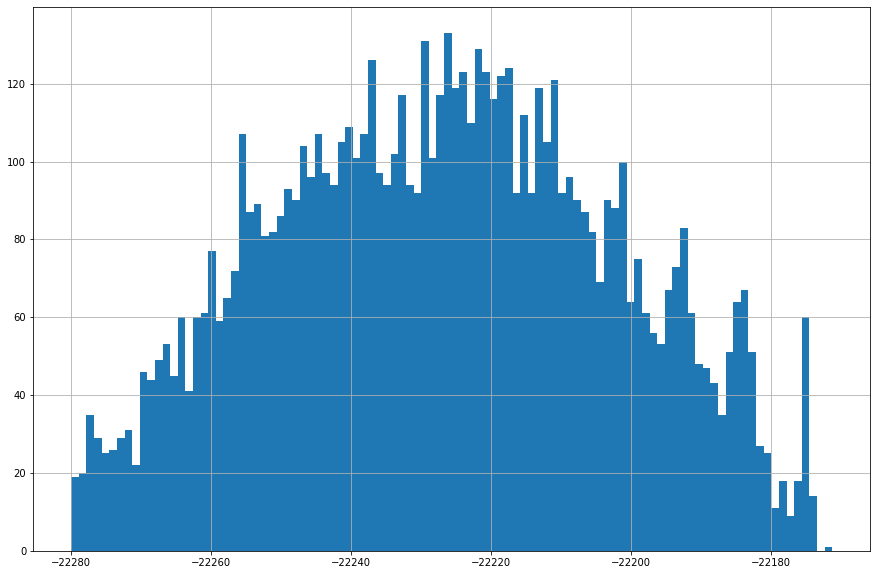

In [ ]:
df_new.log_likelihood.hist(bins=100, figsize=(15, 10));

In [ ]:


for percentile in [50, 75, 90, 95, 98, 99, 100]:
    print(percentile, np.percentile(df_new['log_likelihood'], percentile))
    


50 -22226.43893044981
75 -22208.88976843607
90 -22193.068270797034
95 -22185.476106900984
98 -22180.88087175798
99 -22175.53418927278
100 -22171.2777479766


not bad result

## Group by

In [ ]:
# df_new.groupby(['location', 'keyword', 'target'])[['keyword', 'text']].agg(np.size).sort_values(ascending=False).head(50)

TypeError: ignored

za duzo kolumn do wyswietlenia 

In [ ]:
df_new.groupby(['location', 'keyword', 'target'])[['keyword']].agg(np.size).sort_values(ascending=False).head(50)

location  keyword             target
                              1         40
          razed               1         24
          detonation          0         18
          suicide%20bomber    1         18
          body%20bags         0         17
          blizzard            0         17
          twister             0         17
USA       sandstorm           1         17
          wrecked             0         16
          nuclear%20disaster  1         16
          rescuers            1         16
          sinking             0         16
          smoke               0         16
          army                0         16
                              0         16
          debris              1         15
          blood               0         15
          derailment          1         14
          bombing             1         14
          explode             0         14
          suicide%20bombing   1         14
          forest%20fires      1         14
          drown  

group by gives first assumptions, there is a lot without location lets rename those as no_location

In [ ]:
lets filter a bii

In [ ]:
'without location are --',len(df_new[df_new.location==''])

('without location are --', 2467)

##  concatenating columns

In [ ]:
df_= df_new.location.replace({'':'no_location'}, regex=True)

AttributeError: ignored

replacing with apply

In [ ]:
df.to_hdf

In [ ]:
df_new.to_hdf('/content/drive/MyDrive/pandas-playground/df_new.hdf', key='df_new', mode='w')
df1= pd.read_hdf('/content/drive/MyDrive/pandas-playground/df_new.hdf')

In [ ]:
#this operation was not possible on slice there was need to save and read and then no problems
df1['location']= df1.location.apply(lambda x:x if x !='' else 'no_location')
df1['keyword']= df1.keyword.apply(lambda x:x if x !='' else 'no_keyword')

In [ ]:
df1.sample(5)

,id,keyword,location,text,target,text_len,log_likelihood
6687,9581,thunder,no_location,Ebay Snipe RT? http://t.co/SlQnph34Nt Lego Pow...,0,116,-22246.277719
1210,1744,buildings%20burning,"Chicago, IL",@joshcorman #infosec rather you knew it or no...,0,129,-22229.403059
2428,3489,derailed,L'Enfant Plaza Metro Station,1 of those days when ya don't realize till alr...,1,141,-22268.511830
6810,9756,tragedy,"Los Angeles, CA",Can't find my ariana grande shirt this is a f...,0,60,-22204.893356
1557,2248,chemical%20emergency,no_location,Emergency 4 Harbor City Mod v4.5.2 #6 Chemical...,1,109,-22231.732543


In [ ]:
df1[df1.keyword.str.contains('%20')].sample(10)

so lets replace string with string

In [ ]:
df1.keyword= df.keyword.replace({'%20': ' '}, regex=True)


In [ ]:
df1.location= df.location.replace({'??': ' '})
df1['location']= df1.location.apply(lambda x:x if x !='' else 'no_location')

In [ ]:
df1['user']=df1.text.str.extract('(@[a-zA-Z ])')
df1.sample(10)


,id,keyword,location,text,target,text_len,log_likelihood,user
3986,5663,floods,Adventist - Lesson Sabbath,Myanmar Flooding: Heavy monsoon rains during t...,1,134,-22255.323749,NaN
7256,10387,whirlwind,Somewhere between here & there,I stand alone\ndon't piss and moan\nabout my c...,0,133,-22226.024127,NaN
2187,3134,debris,Hong Kong,MH370: Reunion debris is from missing Malaysia...,1,76,-22208.217263,NaN
579,837,bioterror,"Silver Spring, MD",.@APHL responds: FedEx no longer to transport ...,1,115,-22239.852395,@A
4663,6629,inundated,United States,#tech Data Overload: The Growing Demand for Co...,0,136,-22269.647818,NaN
6370,9102,suicide bomb,no_location,...//..// whao.. Pic of 16yr old PKK suicide b...,1,124,-22253.234324,NaN
5579,7960,razed,no_location,The Latest: More Homes Razed by Northern Calif...,1,94,-22220.369943,NaN
7264,10399,whirlwind,140920-21 & 150718-19 BEIJING,Eyes smile. Pretty smile. Good hair. Miss Luh...,0,88,-22227.445500,NaN
7190,10302,weapon,"UK,singer,songwriter,?2 act",@Weapon_X_music hey guys thanks for a rock in ...,0,81,-22214.751025,@W
2426,3486,derailed,no_location,Relief train carrying survivors of the deraile...,1,116,-22237.326571,@f


lets make tahat work or write regex fuction which is doing that

https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/


48

You can try str.extract and strip, but better is use str.split, because in names of movies can be numbers too. Next solution is replace content of parentheses by regex and strip leading and trailing whitespaces:

#convert column to string
df['movie_title'] = df['movie_title'].astype(str)

#but it remove numbers in names of movies too
df['titles'] = df['movie_title'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
df['titles1'] = df['movie_title'].str.split('(', 1).str[0].str.strip()
df['titles2'] = df['movie_title'].str.replace(r'\([^)]*\)', '').str.strip()
print df
          movie_title      titles      titles1      titles2
0  Toy Story 2 (1995)   Toy Story  Toy Story 2  Toy Story 2
1    GoldenEye (1995)   GoldenEye    GoldenEye    GoldenEye
2   Four Rooms (1995)  Four Rooms   Four Rooms   Four Rooms
3   Get Shorty (1995)  Get Shorty   Get Shorty   Get Shorty
4      Copycat (1995)     Copycat      Copycat      Copycat




6

You should assign text group(s) with () like below to capture specific part of it.

new_df['just_movie_titles'] = df['movie_title'].str.extract('(.+?) \(')
new_df['just_movie_titles']


https://stackoverflow.com/questions/36028932/how-to-extract-specific-content-in-a-pandas-dataframe-with-a-regex

In [ ]:
df1.sample(30)

,id,keyword,location,text,target,text_len,log_likelihood,user
6494,9286,sunk,i beg vines sorry,@UnrealTouch fuck sake john Jesus my heart jus...,1,53,-22221.006372,NaN
6972,10001,tsunami,Hawaii,Meet Brinco your own personal earthquake snd t...,1,97,-22231.189210,NaN
5617,8015,refugees,Statute Of Limitations_,Repulsive! Refugees-Victimiser-#Dutton Evangel...,0,139,-22218.515493,NaN
6260,8945,storm,"State College, Pa",Typhoon Soudelor was captured in this incredib...,1,128,-22237.356158,NaN
4398,6254,hijacking,"Athens,Greece",The Murderous Story Of AmericaÛªs First Hijac...,1,73,-22206.231829,NaN
596,863,bioterror,New York,#NowPlaying at #orchardalley in #LES of #nyc '...,1,138,-22226.279578,NaN
5667,8087,rescue,no_location,Last Chance Animal Rescue has 3 new posts. htt...,0,79,-22216.799378,NaN
3764,5346,fire,Arizona,There's a fire in the Catalinas. Looks kinda c...,1,110,-22222.394515,NaN
2403,3460,derailed,"Pune, mostly",#Adani &amp; #Modi plan for mining derailed! A...,0,133,-22275.736123,NaN
711,1026,blazing,"Pennsylvania, PA",I still don't know how 8 hours of physical act...,0,85,-22240.132251,NaN


In [ ]:
df1.groupby(['location', 'keyword', 'target'])[['keyword']].agg(np.size).sort_values(ascending=False).head(50)

location     keyword               target
no_location  no_keyword            1         40
             razed                 1         24
             detonation            0         18
             suicide%20bomber      1         18
             body%20bags           0         17
USA          sandstorm             1         17
no_location  twister               0         17
             blizzard              0         17
             smoke                 0         16
             sinking               0         16
             wrecked               0         16
             army                  0         16
             no_keyword            0         16
             rescuers              1         16
             nuclear%20disaster    1         16
             debris                1         15
             blood                 0         15
             explode               0         14
             forest%20fires        1         14
             bombing               1         1

In [ ]:
df.sample(20)

In [ ]:
df['text_all']= df.apply(lambda x: x['keyword'] +' ' +x['location']+' ' +x['text'], axis=1)

In [ ]:
temp_table= data['Name'].str.split(" ", n=1, expand=True)
temp_table

In [ ]:
data['First Name']= temp_table[0]
data['Last Name']= temp_table[1]

In [ ]:
clean_dict={'%':''}

In [ ]:
df1= df1.replace(clean_dict, regex=True)

In [ ]:
df1.loc[2], df1.iloc[2]

## ast.literal.eval() to restore original data type

In [ ]:
df.ast.literal.eval()

In [ ]:
def read_harry_potter():
    lines = []
    with open("../input/harry_potter.txt", "r") as f:
        for line in f.readlines():
            line = line.replace("\n", " ")
            if line:
                lines.append(line)
                
    return "".join(lines)

In [ ]:
text=read_harry_potter()

In [ ]:
df['words_len'] = df['text'].map(lambda x: len(x))

for percentile in [50, 75, 90, 95, 98, 99, 100]:
    print(percentile, np.percentile(df['words_len'], percentile))
    
df['words_len'].hist(bins=50);

In [ ]:
df_light = df.sample(frac=0.1)

In [ ]:
df['Product'].value_counts()

In [ ]:
df['label'] = df['target']
df['target'] = df['target'].factorize()[0]
df['doc_id'] = df.index